# Trabalho Prático 02 - IA_24/25

## Autores:
- Nuno Castro_4944  
- Jorge Mendes_18466  
- André Freitas_25975  

### Janeiro 2025


## Introdução
A aplicação de técnicas de aprendizagem máquina e análise de dados em problemas práticos requer uma abordagem estruturada e bem planeada. Neste trabalho, exploraremos três temas principais: Classificação Automática, Agrupamento (Clustering) e Regras de Associação. Estes tópicos cobrem uma ampla gama de aplicações no campo da Inteligência Artificial e fornecem ferramentas fundamentais para analisar, prever e descobrir padrões em dados.

***



# Agrupamento/Clustering

Agrupamento (Clustering) é uma técnica de aprendizagem não supervisionada utilizada para organizar um conjunto de dados em grupos homogéneos, chamados clusters.
Os elementos dentro de um cluster têm de ser mais melhantes entre si do que com elementos de outros clusters.
##Proposta



*   Separar propriedades consoante as suas características, obtendo uma visão geral do tipo de propriedades existentes.




## 1.  Seleção de dados

### 1.1  Download do Dataset

Origem: https://www.kaggle.com/datasets/jaynadkarni/housing-dataset

In [1]:
# Download dataset from Kaggle
import kagglehub

dataset_path = "jaynadkarni/housing-dataset"
!kaggle datasets download {dataset_path} -p /content/ --unzip

Dataset URL: https://www.kaggle.com/datasets/jaynadkarni/housing-dataset
License(s): apache-2.0
  0% 0.00/4.63k [00:00<?, ?B/s]
100% 4.63k/4.63k [00:00<00:00, 7.58MB/s]


### 1.2 Apresentação do Conteudo do ficheiro

In [2]:
# Imports
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


# Read the file
path = "/content/Housing.csv"
dados = pd.read_csv(path)
# Print head
dados.tail()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


## 2. Pré-Processamento de dados

###  2.1  Seleção de colunas

In [3]:
print(dados.columns)


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')


### 2.2 Tratamento dos Dados



1.   Verificar valores ausentes;
2.   Eliminar linhas com valores ausentes;
3.   Transformar booleanos em valores numéricos;
4.   Transformar valores em texto, para valores númericos de forma a poderem sem tratados;




In [4]:
# 1. Verificar valores ausentes
print("Valores ausentes por coluna:")
print(dados.isnull().sum())

# 2. Tratar valores ausentes
dados.dropna(inplace=True)

# Transformar variáveis booleanas/categóricas para valores numéricos
boolean_columns = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
dados[boolean_columns] = dados[boolean_columns].replace({'yes': 1, 'no': 0})

# Transformar 'furnishingstatus' para valores numéricos
dados['furnishingstatus'] = dados['furnishingstatus'].replace({
    'furnished': 2, 'semi-furnished': 1, 'unfurnished': 0
})


# Verificar a substituição
print("Valores únicos em furnishingstatus após substituição:")
print(dados['furnishingstatus'].unique())


Valores ausentes por coluna:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64
Valores únicos em furnishingstatus após substituição:
[2 1 0]


<ipython-input-4-827fd137a763>:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados[boolean_columns] = dados[boolean_columns].replace({'yes': 1, 'no': 0})
<ipython-input-4-827fd137a763>:13: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dados['furnishingstatus'] = dados['furnishingstatus'].replace({


### 3. Normalização de dados


Normalizamos os dados utilizando o método **Min-Max Sacling**, adequado para clustering.

A normalização dos dados é uma técnica de pré-processamento usada para transformar as variáveis de um conjunto de dados para uma escala comum, sem distorcer as diferenças nas gamas de valores. Isso é importante porque muitos algoritmos de aprendizado de máquina funcionam melhor quando as variáveis de entrada são comparáveis em termos de escala.

**Exemplo:**
Num conjunto de dados com duas variáveis: idade (com valores entre 18 e 80 anos) e renda anual (que pode variar de 10.000 a 100.000 dólares). Sem normalização, o algoritmo de clustering pode tratar a renda como uma variável mais importante do que a idade, já que os valores da renda são muito maiores.

In [29]:
from sklearn.preprocessing import MinMaxScaler

colunas_para_normalizar = [
    'price', 'area', 'bedrooms', 'bathrooms', 'stories',
    'parking', 'mainroad', 'guestroom', 'basement',
    'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus'
]



# Inicializar o normalizador
scaler = MinMaxScaler()

# Aplicar normalização
dados_normalizados = scaler.fit_transform(dados[colunas_para_normalizar])

# Converter para DataFrame para facilitar o uso
dados_normalizados = pd.DataFrame(dados_normalizados, columns=colunas_para_normalizar)

# Exibir os primeiros dados normalizados
print("Dados normalizados:")
print(dados_normalizados.head())

# Verificar valores únicos na coluna 'furnishingstatus' após normalização
valores_unicos = dados_normalizados['furnishingstatus'].unique()

Dados normalizados:
      price      area  bedrooms  bathrooms   stories   parking  mainroad  \
0  1.000000  0.396564       0.6   0.333333  0.666667  0.666667       1.0   
1  0.909091  0.502405       0.6   1.000000  1.000000  1.000000       1.0   
2  0.909091  0.571134       0.4   0.333333  0.333333  0.666667       1.0   
3  0.906061  0.402062       0.6   0.333333  0.333333  1.000000       1.0   
4  0.836364  0.396564       0.6   0.000000  0.333333  0.666667       1.0   

   guestroom  basement  hotwaterheating  airconditioning  prefarea  \
0        0.0       0.0              0.0              1.0       1.0   
1        0.0       0.0              0.0              1.0       0.0   
2        0.0       1.0              0.0              0.0       1.0   
3        0.0       1.0              0.0              1.0       1.0   
4        1.0       1.0              0.0              1.0       0.0   

   furnishingstatus  
0               1.0  
1               1.0  
2               0.5  
3             

#### 4. Escolher o número de clusters ideal

Como o K-Means exige um número fixo de clusters (k), usamos o método do Elbow para escolher o valor ideal de k. Este método envolve a plotagem da soma das distâncias dentro do cluster (inércia) para diferentes valores de k e observando o ponto onde a taxa de diminuição começa a diminuir (formando um ***cotovelo***).

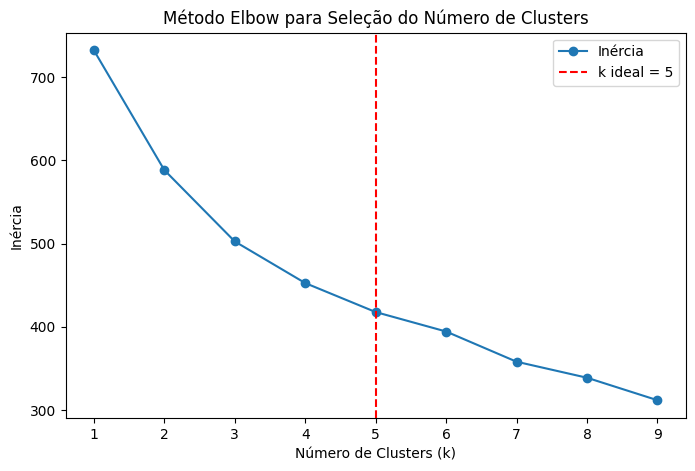

In [6]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcular a soma das distâncias (inércia) para diferentes valores de k
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_normalizados)
    inertia.append(kmeans.inertia_)

# Escolher o número de clusters ideal
k_ideal = 5

# Plotar o gráfico do Método Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', label='Inércia')
plt.axvline(x=k_ideal, color='r', linestyle='--', label=f'k ideal = {k_ideal}')
plt.title('Método Elbow para Seleção do Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.legend()
plt.show()



O gráfico do Elbow irá mostrar a "curvatura" da inércia em relação ao número de clusters. O valor de k que está no ponto de inflexão (onde a diminuição da inércia começa a se estabilizar) é geralmente o número ideal de clusters.

Conforme a análise do gráfico optamos por utilizar k=5

###5. Análise de Clusters

In [7]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Número de clusters escolhido (ajuste com base no Método Elbow)
k = 5

# Aplicar o K-Means
kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(dados_normalizados)

# Adicionar os clusters ao dataset original
dados['Cluster'] = clusters

# Estatísticas médias por cluster
resumo_clusters = dados.groupby('Cluster').mean()
print("Características médias por cluster:")
print(resumo_clusters)



Características médias por cluster:
                price         area  bedrooms  bathrooms   stories  mainroad  \
Cluster                                                                       
0        4.081088e+06  5008.688119  2.821782   1.158416  1.683168      1.00   
1        6.139666e+06  5978.707071  3.121212   1.484848  2.646465      1.00   
2        6.133319e+06  6313.086957  3.173913   1.362319  1.594203      1.00   
3        3.350942e+06  3610.453333  2.973333   1.226667  1.533333      0.00   
4        4.911410e+06  4970.110000  2.950000   1.340000  1.570000      0.98   

         guestroom  basement  hotwaterheating  airconditioning   parking  \
Cluster                                                                    
0         0.034653  0.000000         0.064356         0.000000  0.643564   
1         0.171717  0.010101         0.010101         1.000000  0.939394   
2         0.478261  1.000000         0.000000         0.434783  0.855072   
3         0.066667  0.280000  

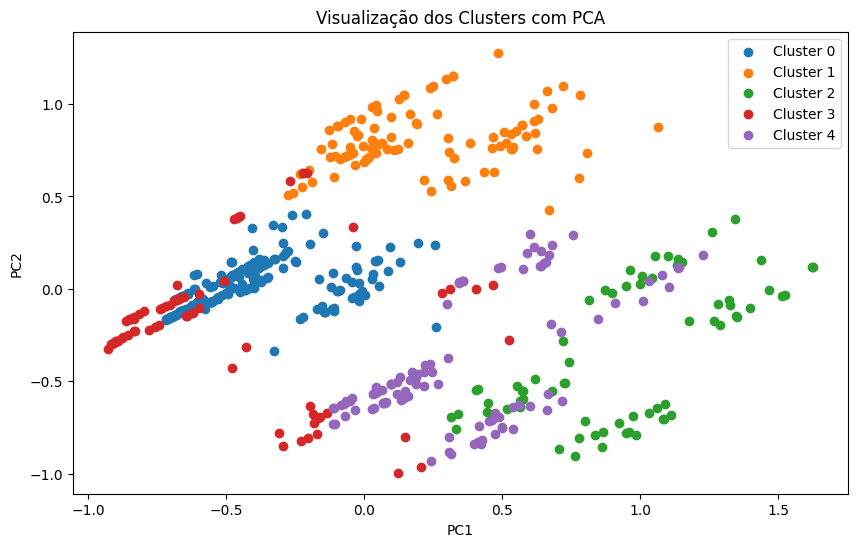

In [8]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduzir para 2 dimensões com PCA
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_normalizados)

# Adicionar os clusters ao dataset PCA
dados_pca = pd.DataFrame(dados_pca, columns=['PC1', 'PC2'])
dados_pca['Cluster'] = clusters

# Plotar os clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    plt.scatter(dados_pca[dados_pca['Cluster'] == cluster]['PC1'],
                dados_pca[dados_pca['Cluster'] == cluster]['PC2'], label=f'Cluster {cluster}')

plt.title('Visualização dos Clusters com PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()


In [9]:
# Calcular as características médias por cluster
resumo_clusters = dados.groupby('Cluster').mean()

print("Resumo das características médias por cluster:")
print(resumo_clusters)

Resumo das características médias por cluster:
                price         area  bedrooms  bathrooms   stories  mainroad  \
Cluster                                                                       
0        4.081088e+06  5008.688119  2.821782   1.158416  1.683168      1.00   
1        6.139666e+06  5978.707071  3.121212   1.484848  2.646465      1.00   
2        6.133319e+06  6313.086957  3.173913   1.362319  1.594203      1.00   
3        3.350942e+06  3610.453333  2.973333   1.226667  1.533333      0.00   
4        4.911410e+06  4970.110000  2.950000   1.340000  1.570000      0.98   

         guestroom  basement  hotwaterheating  airconditioning   parking  \
Cluster                                                                    
0         0.034653  0.000000         0.064356         0.000000  0.643564   
1         0.171717  0.010101         0.010101         1.000000  0.939394   
2         0.478261  1.000000         0.000000         0.434783  0.855072   
3         0.066667 

### 6. Validação dos Clusters
Foi usado Silhouette Score para avaliar a qualidade dos clusters.

**Silhouette Score:**  mede o quão bem cada ponto está atribuído ao seu cluster, considerando a separação entre clusters e a coesão dentro do cluster.

In [10]:
from sklearn.metrics import silhouette_score

# Calcular o Silhouette Score
silhouette_avg = silhouette_score(dados_normalizados, clusters)
print(f"Silhouette Score para k={k}: {silhouette_avg}")


Silhouette Score para k=5: 0.25102904644430674


Interpretação:

#####O Silhouette Score varia entre -1 e 1:
#####**1:** Clusters muito bem separados e compactos.
#####**0:** Padrão de clusters sobrepostos ou sem separação clara.
#####**-1:** Pontos atribuídos ao cluster errado.
#####**Entre (0.5 e 1) temos um bom cluster**, o que não se verificou no nosso caso de estudo.

###7. Procura de novas variáveis

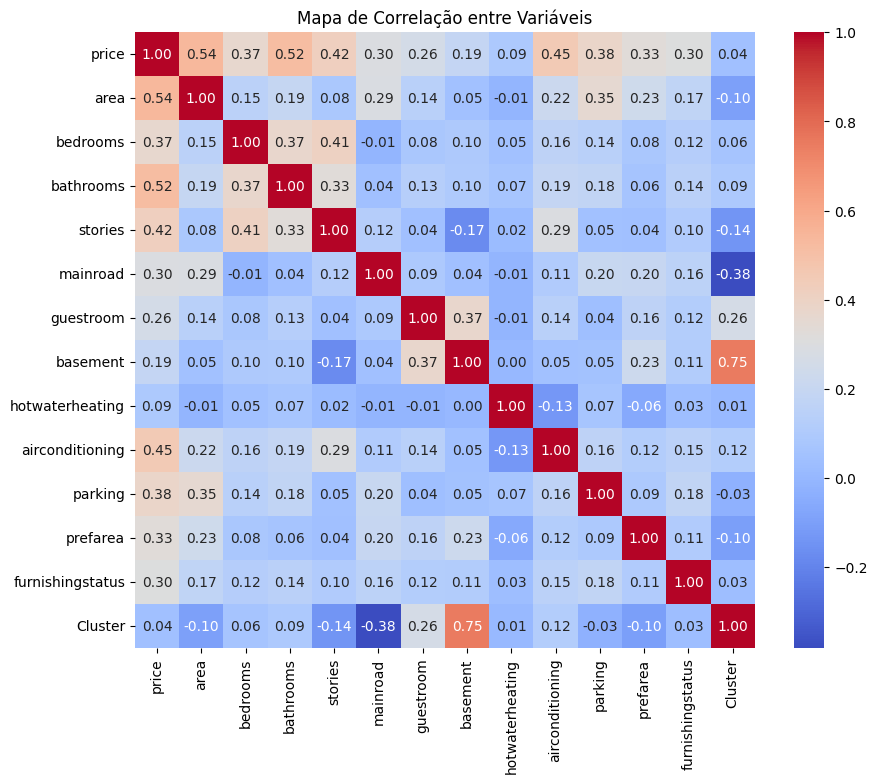

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular a correlação entre variáveis
correlacoes = dados.corr()

# Plotar um heatmap de correlações
plt.figure(figsize=(10, 8))
sns.heatmap(correlacoes, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Correlação entre Variáveis")
plt.show()

**Variaveis com boa correlação entre si**

* **Area:** Diferencia propriedades grandes de pequenas;
* **Bathrooms:** Ajuda a identificar propriedades mais completas;
* **Airconditioning:** Destaca propriedades com conforto superior;
* **Basement:** Alta correlação com os clusters identificados;
* **Guestroom:** Complementa a segmentação de propriedades familiares e de luxo.

In [12]:
variaveis_selecionadas = ['area', 'bathrooms', 'airconditioning', 'basement', 'guestroom']
dados_selecionados = dados[variaveis_selecionadas]


### 8. Normalizar os **novos dados**

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Normalizar os dados selecionados
scaler = MinMaxScaler()
dados_normalizados = scaler.fit_transform(dados_selecionados)

# Converter de volta para DataFrame para facilitar o uso
dados_normalizados = pd.DataFrame(dados_normalizados, columns=variaveis_selecionadas)

print("Dados normalizados:")
print(dados_normalizados.head())

Dados normalizados:
       area  bathrooms  airconditioning  basement  guestroom
0  0.396564   0.333333              1.0       0.0        0.0
1  0.502405   1.000000              1.0       0.0        0.0
2  0.571134   0.333333              0.0       1.0        0.0
3  0.402062   0.333333              1.0       1.0        0.0
4  0.396564   0.000000              1.0       1.0        1.0


### 9. Escolha de k

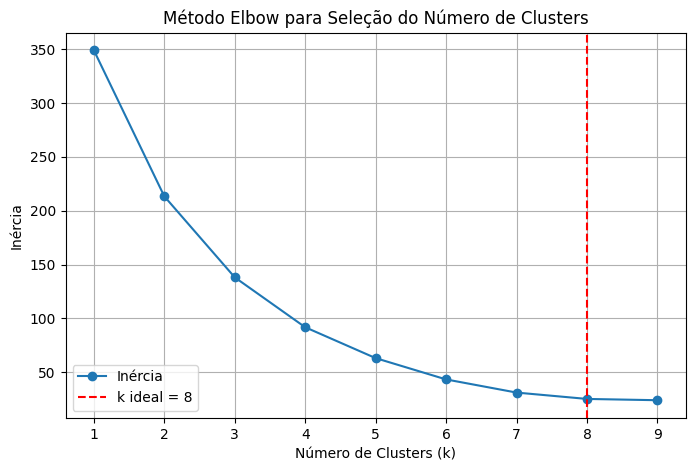

In [14]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calcular a soma das distâncias (inércia) para diferentes valores de k
inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dados_normalizados)
    inertia.append(kmeans.inertia_)

# Escolher o número de clusters ideal (exemplo: k=3)
k_ideal = 8

# Plotar o gráfico do Método Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o', label='Inércia')
plt.axvline(x=k_ideal, color='r', linestyle='--', label=f'k ideal = {k_ideal}')
plt.title('Método Elbow para Seleção do Número de Clusters')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.grid()
plt.legend()
plt.show()

### 10. Criação de Clustrers

In [15]:
from sklearn.cluster import KMeans

# Definir manualmente o número de clusters
k = 8  # Substitua pelo número desejado de clusters

# Aplicar o K-Means com o valor de k definido
kmeans = KMeans(n_clusters=k, random_state=42)
dados_normalizados['Cluster'] = kmeans.fit_predict(dados_normalizados)

# Ver os clusters adicionados
print("Clusters criados:")
print(dados_normalizados.head())

# Adicionar os clusters ao DataFrame normalizado
dados_normalizados['Cluster'] = kmeans.labels_




Clusters criados:
       area  bathrooms  airconditioning  basement  guestroom  Cluster
0  0.396564   0.333333              1.0       0.0        0.0        2
1  0.502405   1.000000              1.0       0.0        0.0        2
2  0.571134   0.333333              0.0       1.0        0.0        3
3  0.402062   0.333333              1.0       1.0        0.0        4
4  0.396564   0.000000              1.0       1.0        1.0        5


### 11. Silhouette

In [16]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

# Definir o número de clusters (k)
k = 8  # Substitua pelo número desejado

# Aplicar o K-Means
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(dados_normalizados)

# Calcular o Silhouette Score
silhouette_avg = silhouette_score(dados_normalizados, clusters)
print(f"Silhouette Score para k={k}: {silhouette_avg}")

Silhouette Score para k=8: 0.8358814717082849


### 12. Visualização dos clusters

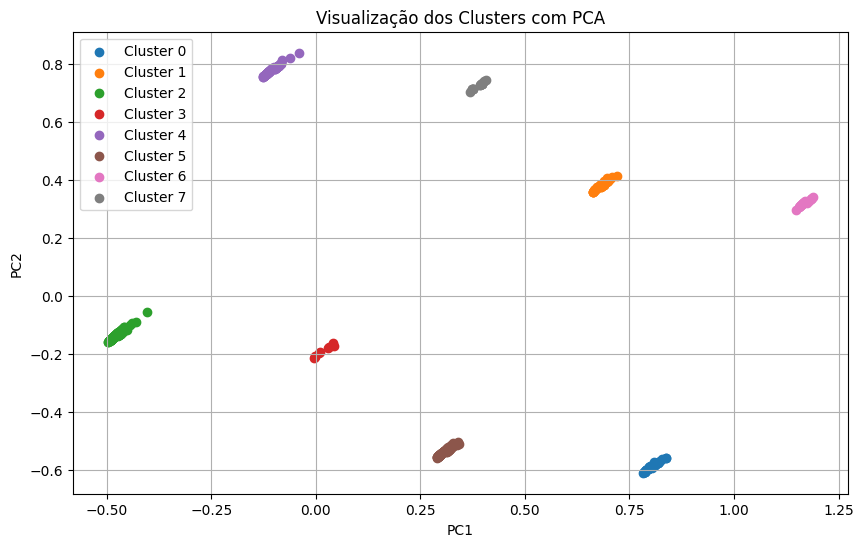

In [17]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd

# Garantir que 'dados_normalizados' é um DataFrame com os clusters
dados_normalizados = pd.DataFrame(dados_normalizados, columns=variaveis_selecionadas)
dados_normalizados['Cluster'] = kmeans.labels_

# Reduzir para 2 dimensões com PCA
pca = PCA(n_components=2)
dados_pca = pca.fit_transform(dados_normalizados.drop('Cluster', axis=1))

# Criar DataFrame para visualização
dados_pca = pd.DataFrame(dados_pca, columns=['PC1', 'PC2'])
dados_pca['Cluster'] = dados_normalizados['Cluster']

# Plotar os clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = dados_pca[dados_pca['Cluster'] == cluster]
    plt.scatter(cluster_data['PC1'], cluster_data['PC2'], label=f'Cluster {cluster}')

plt.title('Visualização dos Clusters com PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.grid()
plt.show()

In [18]:
# Calcular as médias das variáveis por cluster
resumo_clusters = dados_normalizados.groupby('Cluster').mean()
print("Resumo das características médias por cluster:")
print(resumo_clusters)

Resumo das características médias por cluster:
             area  bathrooms  airconditioning  basement  guestroom
Cluster                                                           
0        0.277526   0.136364              0.0       1.0        1.0
1        0.283762   0.145299              1.0       1.0        0.0
2        0.211807   0.047420              0.0       0.0        0.0
3        0.248866   0.185185              0.0       0.0        1.0
4        0.286113   0.142322              1.0       0.0        0.0
5        0.200892   0.106996              0.0       1.0        0.0
6        0.305160   0.086420              1.0       1.0        1.0
7        0.294401   0.215686              1.0       0.0        1.0


### Análise de Resultados
Os resultados mostram as caracteristicas médias dos diferentes clusters, os padrões específicos encontrados no conjunto de dados.
As conclusões gerais que podemos retirar da análise dos dados é:
* Cluster 6 representa propriedades Premium, com a maior área média (0,305) e todas as comodiades presentes
* Cluster 2 representa propriedades básicas, casas pequenas e sem comodidades como cave ou ar condicionado
* Cluster 7 representa casas com foco no conforto, casas grandes com muitas casas de banho, ar acondicionado e quarto de hóspedes
* Alguns clusters têm estas características consistentemente presentes (ex.: Cluster 1 e Cluster 6).


####3.0 Decision Trees

#### Árvores de Decisão para Previsão do Número de Quartos

##### Objetivo:
Este código utiliza árvores de decisão para prever o número de quartos (`bedrooms`) de uma casa com base em diversas características do imóvel. O modelo analisa variáveis como `area` (tamanho da casa), `price` (preço), `bathrooms` (número de casas de banho), entre outras, e gera regras de decisão que permitem fazer previsões precisas.

##### O que a Árvore de Decisão está a avaliar:
- **Seleção de características relevantes**: Identificar as variáveis que mais influenciam o número de quartos.
- **Geração de regras de decisão**: Criar condições do tipo "SE X, ENTÃO Y" para dividir os dados em grupos homogéneos.
- **Classificação do alvo**: Determinar o valor da variável-alvo (`bedrooms`) em função das regras acumuladas ao longo dos nós da árvore.

##### Benefícios da Utilização da Árvore de Decisão:
1. **Simplicidade e Interpretação**: As regras de decisão são intuitivas e fáceis de interpretar, o que permite uma compreensão clara das relações entre as variáveis.
2. **Identificação de Fatores Críticos**: Revela as características mais influentes, como `area` ou `bathrooms`, no tamanho esperado da casa.
3. **Utilidade Prática**: Pode ser utilizada no mercado imobiliário para avaliar como diferentes fatores afetam as características das casas.

##### Exemplo de Previsão:
A árvore de decisão pode prever, por exemplo:
- **Se `area > 0.7` e `bathrooms <= 0.5`, o número de quartos previsto é 2.**

O modelo baseia-se em métricas como a **Impureza de Gini** ou **Entropia** para criar divisões nos dados que maximizem a separação entre as classes do alvo.

Este código implementa a construção, avaliação e visualização de uma árvore de decisão, fornecendo insights valiosos sobre os dados e melhorando a capacidade de previsão do modelo.


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Usar os dados normalizados diretamente
# Selecionar colunas relevantes para 'X' (todas as colunas normalizadas, sem 'Cluster')
X = dados_normalizados.drop(columns=['bedrooms'], errors='ignore')  # Remove 'bedrooms' de X, se existir
y = dados['bedrooms']  # O alvo permanece como o número de quartos no conjunto original

# Codificar o alvo como valores numéricos, se necessário
y = LabelEncoder().fit_transform(y)

# Dividir os dados em treino (80%) e teste (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Exibir os formatos dos dados de treino e teste
print(f"Formato dos dados de treino: X_train: {X_train.shape}, y_train: {len(y_train)}")
print(f"Formato dos dados de teste: X_test: {X_test.shape}, y_test: {len(y_test)}")


Formato dos dados de treino: X_train: (436, 12), y_train: 436
Formato dos dados de teste: X_test: (109, 12), y_test: 109


####3.1 Treinar o modelo
Este código treina uma árvore de decisão para prever o número de quartos (bedrooms) com base nos dados disponíveis. O modelo é configurado com uma profundidade máxima de 5 e pelo menos 10 amostras por divisão, para evitar sobreajuste. Após o treino com os dados de treino, o modelo está pronto para ser avaliado e utilizado em previsões futuras.

In [80]:
from sklearn.tree import DecisionTreeClassifier

# Inicia o modelo de Decision Tree com parâmetros ajustados
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

# Treinar o modelo com os dados de treino
clf.fit(X_train, y_train)

# Confirmar que o modelo foi treinado com sucesso
print("Modelo de Decision Tree treinado com sucesso!")


Modelo de Decision Tree treinado com sucesso!


####3.2 Avaliação do modelo
Este código avalia o desempenho da árvore de decisão treinada utilizando o conjunto de teste. São geradas as seguintes métricas:

* Relatório de Classificação: Exibe métricas como precisão, recall e F1-score
para cada classe.
* Matriz de Confusão: Apresenta os erros e acertos em termos de previsões para cada classe.
* Precisão Global: Calcula a percentagem de acertos do modelo, fornecendo uma visão geral da sua performance.
* Estas métricas permitem compreender a eficácia do modelo em prever o número de quartos com base nas características fornecidas.








In [81]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Fazer previsões no conjunto de teste
y_pred = clf.predict(X_test)

# Relatório de classificação com métricas de performance
print("Relatório de classificação:")
print(classification_report(y_test, y_pred))

# Matriz de confusão para visualizar erros e acertos
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Precisão: {accuracy * 100:.2f}%")


Relatório de classificação:
              precision    recall  f1-score   support

           1       0.73      0.76      0.75        25
           2       0.65      0.69      0.67        62
           3       0.29      0.25      0.27        20
           4       0.00      0.00      0.00         2

    accuracy                           0.61       109
   macro avg       0.42      0.43      0.42       109
weighted avg       0.59      0.61      0.60       109

Matriz de confusão:
[[19  6  0  0]
 [ 7 43 12  0]
 [ 0 15  5  0]
 [ 0  2  0  0]]
Precisão: 61.47%


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


####3.3 Desenho da Árvore de Decisão
Este código apresenta uma representação textual da árvore de decisão treinada. Ele mostra:

* Regras de Decisão: Cada nó da árvore é descrito como uma condição baseada nas
variáveis de entrada.
* Estrutura Hierárquica: Demonstra como os dados são divididos em cada nível da árvore para realizar as previsões.
Esta visualização é útil para interpretar as regras utilizadas pelo modelo de forma simples e direta.

In [82]:
from sklearn.tree import export_text

# Visualização textual da árvore de decisão
print("Árvore de Decisão (em texto):")
print(export_text(clf, feature_names=list(X.columns)))


Árvore de Decisão (em texto):
|--- stories <= 0.17
|   |--- price <= 0.18
|   |   |--- area <= 0.06
|   |   |   |--- class: 2
|   |   |--- area >  0.06
|   |   |   |--- area <= 0.45
|   |   |   |   |--- furnishingstatus <= 0.25
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- furnishingstatus >  0.25
|   |   |   |   |   |--- class: 1
|   |   |   |--- area >  0.45
|   |   |   |   |--- class: 2
|   |--- price >  0.18
|   |   |--- prefarea <= 0.50
|   |   |   |--- area <= 0.36
|   |   |   |   |--- price <= 0.31
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- price >  0.31
|   |   |   |   |   |--- class: 2
|   |   |   |--- area >  0.36
|   |   |   |   |--- area <= 0.50
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- area >  0.50
|   |   |   |   |   |--- class: 1
|   |   |--- prefarea >  0.50
|   |   |   |--- bathrooms <= 0.17
|   |   |   |   |--- area <= 0.57
|   |   |   |   |   |--- class: 2
|   |   |   |   |--- area >  0.57
|   |   |   |   |   |--- class: 1
|   |   | 

####3.4 Visualização Gráfica da Árvore de Decisão

Este código gera um gráfico detalhado da árvore de decisão, permitindo:

* Compreensão Visual: Exibir as divisões de dados em cada nó com base nas variáveis de entrada.
* Facilidade de Leitura: Usa bordas arredondadas, cores e tamanhos ajustados para melhorar a interpretação.
Estrutura Completa: Mostra como o modelo utiliza as características para classificar os dados.

Esta visualização é útil para avaliar a lógica do modelo e comunicar os resultados de forma mais intuitiva.

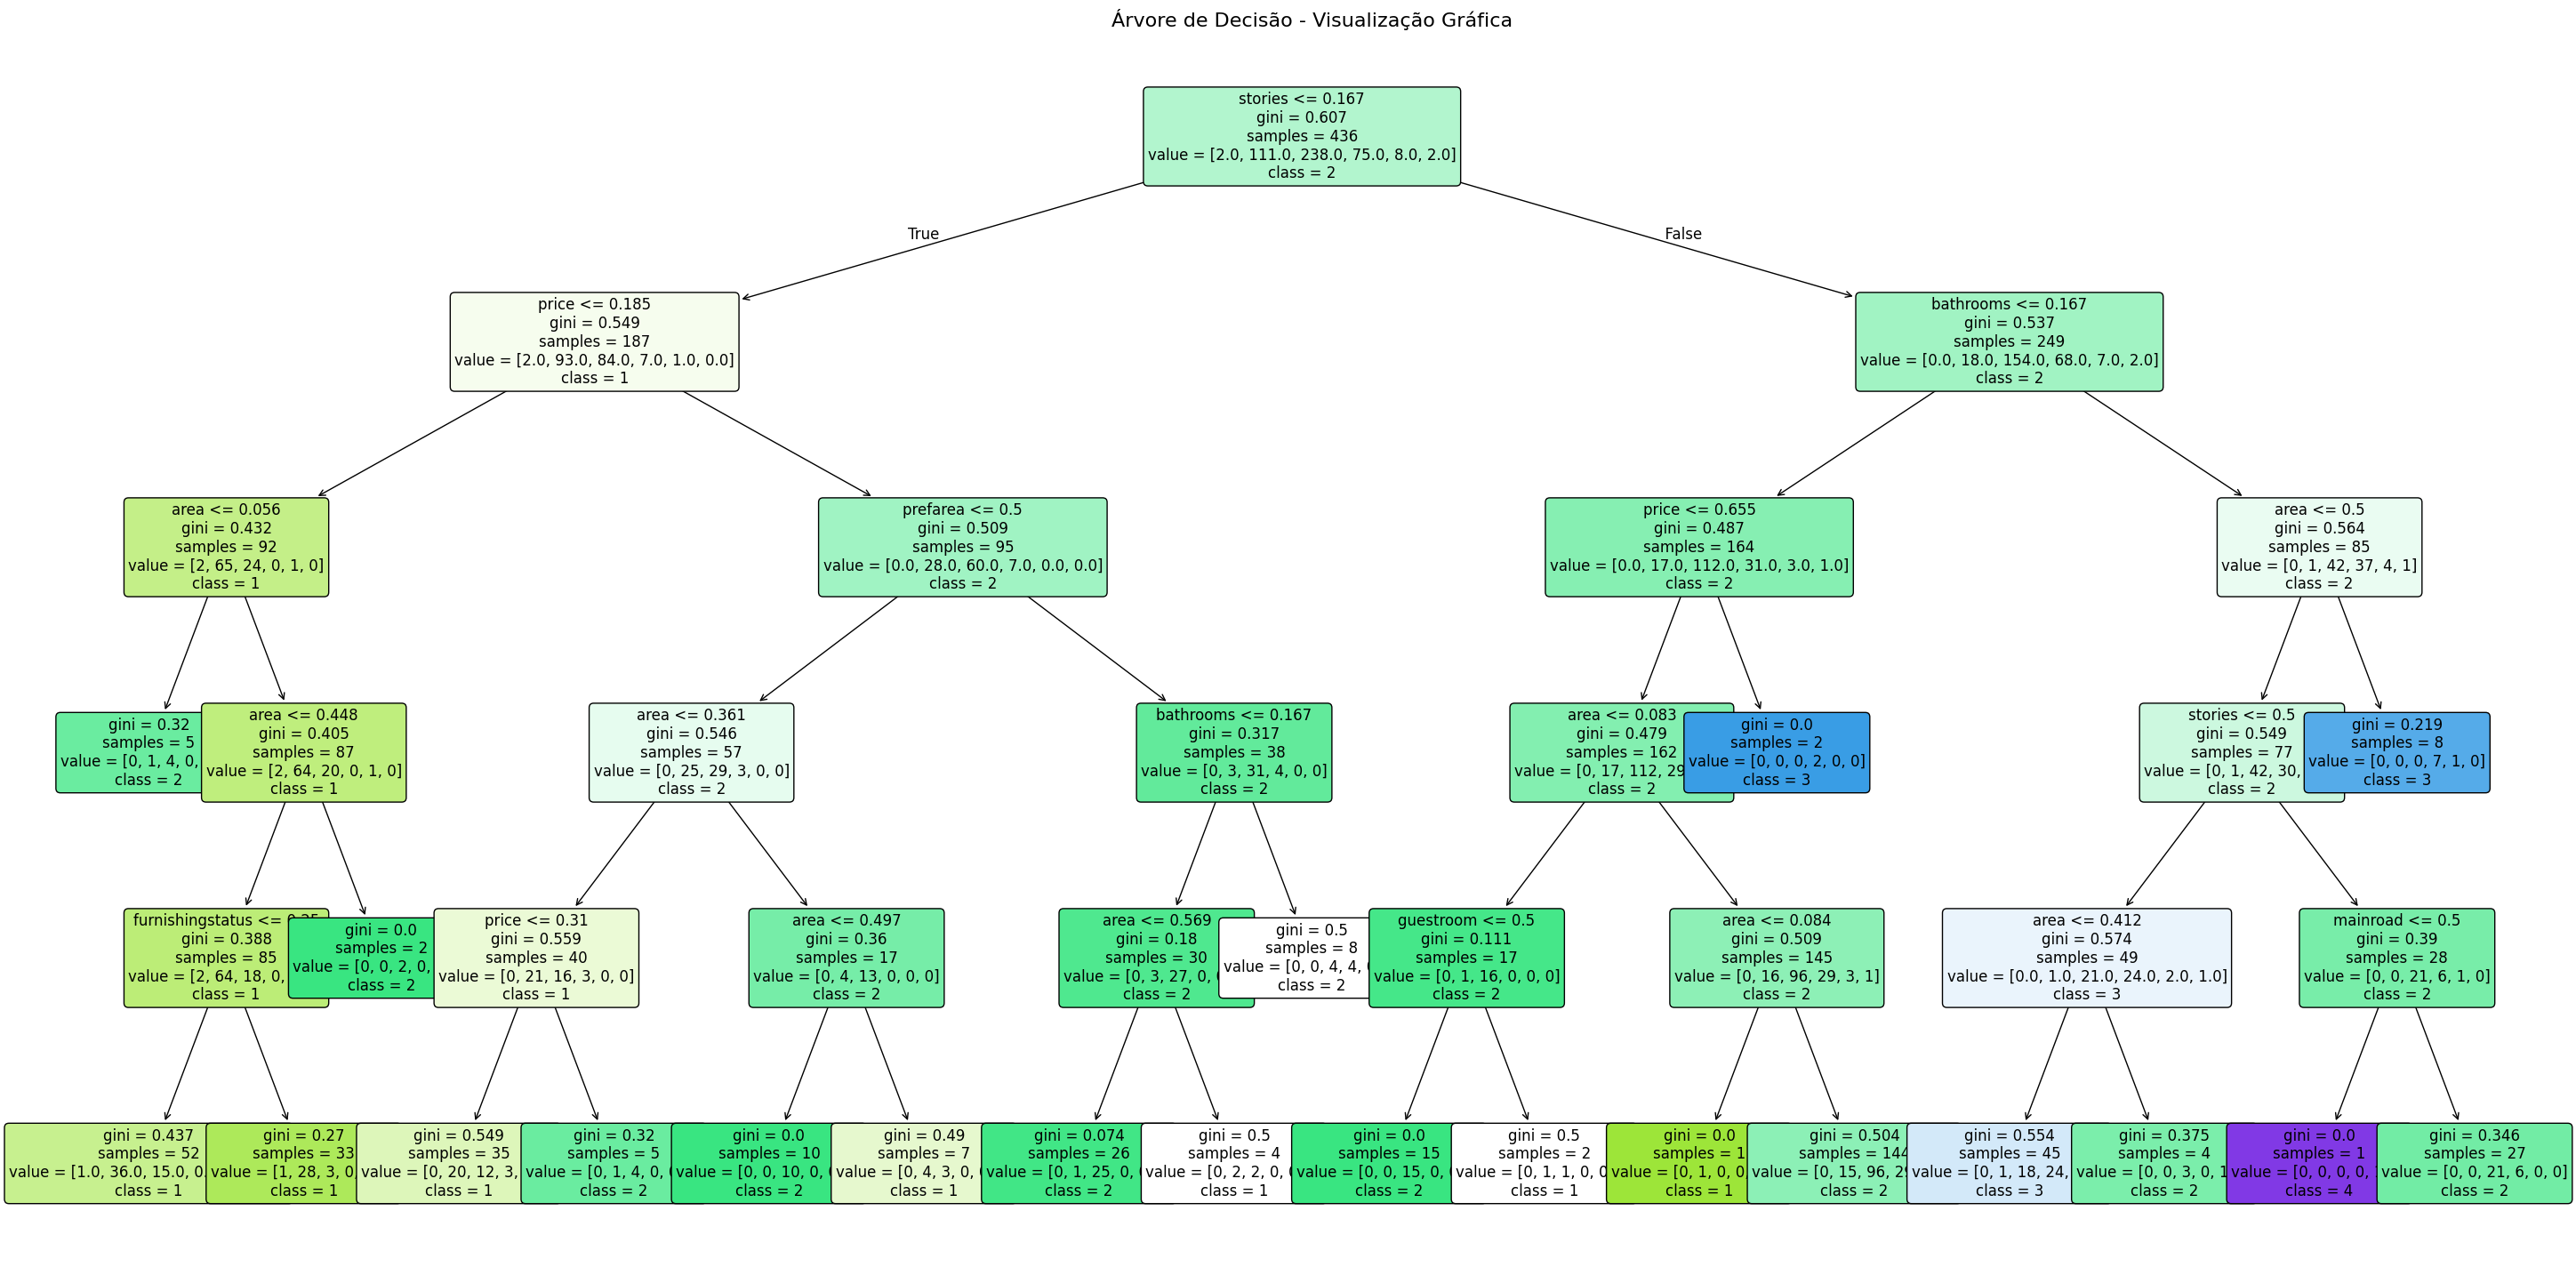

In [83]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Configurar tamanho da figura e outros estilos gráficos
plt.figure(figsize=(36, 18))  # Aumentar a largura e altura para mais espaço
plot_tree(
    clf,
    feature_names=list(X.columns),  # Usar nomes das features
    class_names=[str(cls) for cls in clf.classes_],  # Nomes das classes como strings
    filled=True,  # Preencher com cores
    rounded=True,  # Bordas arredondadas para melhor estética
    fontsize=12  # Fonte maior para melhor leitura
)
plt.title("Árvore de Decisão - Visualização Gráfica", fontsize=16)  # Título claro
plt.show()


####3.5 Importância das variáveis
Este código calcula e apresenta as variáveis mais influentes no modelo de decisão:

* Identificação de Fatores Relevantes: Lista as variáveis em ordem de importância.
* Priorização: Permite identificar quais características têm maior impacto no resultado.
* Facilidade de Análise: Exibe os dados de forma clara e organizada para melhor interpretação.

É útil para entender como o modelo utiliza as variáveis para fazer previsões.








In [84]:
import pandas as pd

# Calcular a importância das variáveis (features)
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': clf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Exibir as importâncias das variáveis com melhor formatação
print("\nImportância das Variáveis:\n")
print(feature_importances.to_string(index=False))



Importância das Variáveis:

         Feature  Importance
         stories    0.357420
            area    0.235169
           price    0.209214
       bathrooms    0.096972
        prefarea    0.058439
        mainroad    0.018062
furnishingstatus    0.014734
       guestroom    0.009990
         parking    0.000000
        basement    0.000000
 hotwaterheating    0.000000
 airconditioning    0.000000


####3.6 Poda de Árvore de Decisão com ccp_alpha

Este código otimiza a árvore de decisão ajustando o parâmetro de poda ccp_alpha:

* Sem Poda Inicial: Treina uma árvore de decisão completa para calcular o caminho de poda.
* Poda com ccp_alpha: Testa múltiplos níveis de poda para encontrar o valor ideal de ccp_alpha.
* Ajuste do Modelo: Seleciona o modelo com melhor precisão no conjunto de teste.
* Benefícios: Reduz a complexidade da árvore e melhora a generalização, evitando overfitting.

A abordagem permite escolher uma árvore mais equilibrada entre precisão e simplicidade.

In [85]:
# Importações necessárias
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Treinar a árvore sem poda inicial
clf_no_poda = DecisionTreeClassifier(random_state=42)
clf_no_poda.fit(X_train, y_train)

# Obter o caminho de complexidade da poda
path = clf_no_poda.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas

# Criar e testar várias árvores com diferentes níveis de poda
models = []
train_scores = []
test_scores = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    models.append(clf)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))

# Identificar o melhor modelo com base na precisão no conjunto de teste
melhor_ccp_alpha_index = test_scores.index(max(test_scores))
melhor_modelo = models[melhor_ccp_alpha_index]

print(f"Melhor ccp_alpha: {ccp_alphas[melhor_ccp_alpha_index]}")
print(f"Precisão no treino: {train_scores[melhor_ccp_alpha_index]:.2f}")
print(f"Precisão no teste: {test_scores[melhor_ccp_alpha_index]:.2f}")


Melhor ccp_alpha: 0.008990072259095469
Precisão no treino: 0.64
Precisão no teste: 0.68


####3.7 Visualização da Árvore de Decisão Podada

Este código apresenta a árvore de decisão após a aplicação da poda:

* Propósito: Visualizar a estrutura otimizada da árvore, destacando as divisões relevantes.
* Características:
 * Usa o modelo treinado com o melhor valor de ccp_alpha.
 * Apresenta os nomes das variáveis (features) e classes.
 * Utiliza cores preenchidas para facilitar a interpretação.
* Benefício: A árvore podada é mais compacta e fácil de interpretar, melhorando a legibilidade e a compreensão dos critérios de decisão.







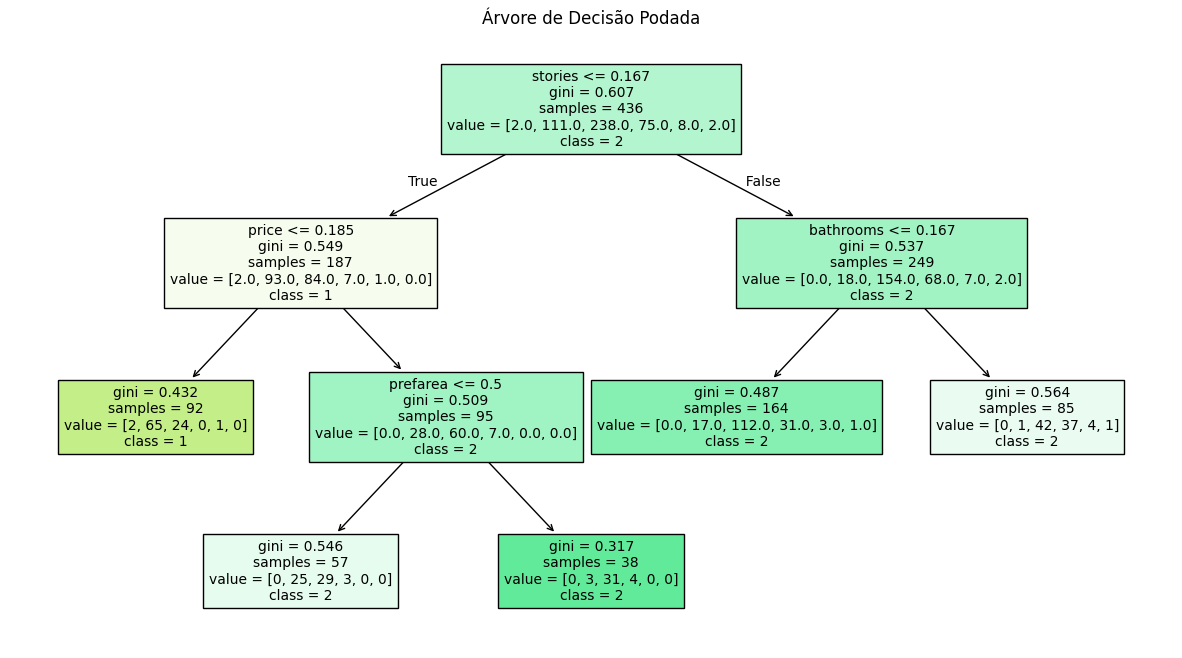

In [86]:
from sklearn.tree import plot_tree

# Visualizar a árvore de decisão podada
plt.figure(figsize=(15, 8))
plot_tree(
    melhor_modelo,
    feature_names=list(X.columns),
    class_names=[str(cls) for cls in melhor_modelo.classes_],
    filled=True,
    fontsize=10
)
plt.title("Árvore de Decisão Podada")
plt.show()


####3.8 Visualização do Impacto da Poda

Este código cria um gráfico para analisar o impacto da poda da árvore de decisão:

* Propósito: Avaliar como diferentes níveis de poda (ccp_alpha) afetam a precisão do modelo.
* Detalhes:
 * Exibe a precisão no conjunto de treino e teste para cada valor de ccp_alpha.
 * Usa um gráfico de linhas com marcadores para facilitar a interpretação.
* Benefício: Ajuda a identificar o nível ideal de poda que equilibra precisão e generalização, evitando modelos subajustados ou sobreajustados.

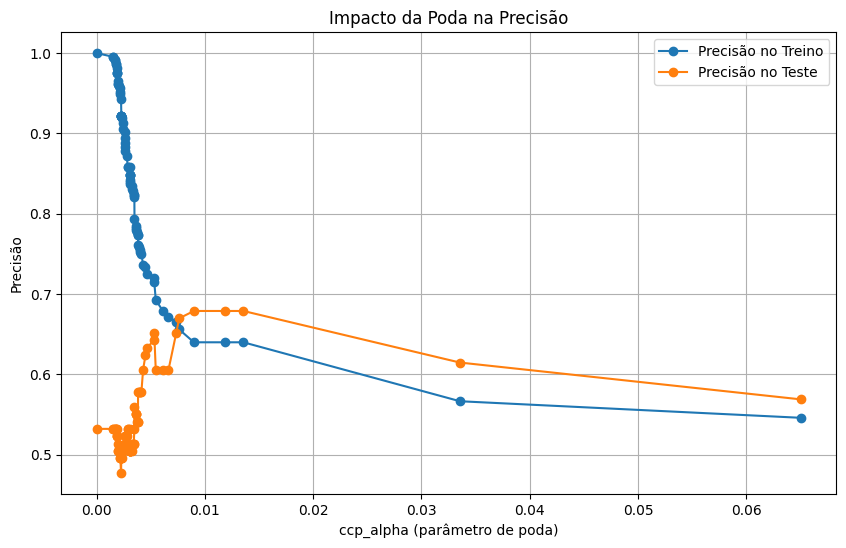

In [87]:
# Visualizar o impacto da poda
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label="Precisão no Treino", marker='o')
plt.plot(ccp_alphas, test_scores, label="Precisão no Teste", marker='o')
plt.xlabel("ccp_alpha (parâmetro de poda)")
plt.ylabel("Precisão")
plt.title("Impacto da Poda na Precisão")
plt.legend()
plt.grid()
plt.show()

####3.9 Random Forest Classifier: Treino e Avaliação

Este código implementa o modelo Random Forest para prever o número de quartos:

* Treino:
 * Usa um conjunto de 100 árvores (estimadores) para aumentar a robustez do modelo.
 * Configurações como max_depth, min_samples_split, e min_samples_leaf ajudam a controlar o sobreajuste.
* Previsão:
 * Aplica o modelo treinado para prever o conjunto de teste.
* Avaliação:
 * Calcula e exibe a precisão do modelo no conjunto de teste.
* Benefício: Random Forest combina várias árvores de decisão para melhorar a precisão e a capacidade de generalização.

In [88]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Inicializar o Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,       # Número de árvores na floresta
    max_depth=10,           # Profundidade máxima de cada árvore
    random_state=42,        # Garantir reprodutibilidade
    min_samples_split=10,   # Número mínimo de amostras para dividir um nó
    min_samples_leaf=5,     # Número mínimo de amostras em uma folha
)

# Treinar o modelo com os dados de treino
rf_model.fit(X_train, y_train)

# Fazer previsões no conjunto de teste
y_pred_rf = rf_model.predict(X_test)

# Avaliar a precisão
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Precisão do Random Forest: {accuracy_rf * 100:.2f}%")


Precisão do Random Forest: 66.97%


####3.10 Relatório de Classificação e Matriz de Confusão

Este código avalia o desempenho do modelo Random Forest:

* Relatório de Classificação:
 * Exibe métricas detalhadas como precisão, recall, e F1-score para cada classe.
* Matriz de Confusão:
 * Apresenta erros e acertos em uma tabela para facilitar a análise dos resultados.
Essas ferramentas ajudam a entender onde o modelo está a ter sucesso e onde pode melhorar.

In [89]:
# Relatório de classificação
print("Relatório de classificação:")
print(classification_report(y_test, y_pred_rf))

# Matriz de confusão
print("Matriz de confusão:")
print(confusion_matrix(y_test, y_pred_rf))


Relatório de classificação:
              precision    recall  f1-score   support

           1       0.75      0.72      0.73        25
           2       0.67      0.87      0.76        62
           3       0.25      0.05      0.08        20
           4       0.00      0.00      0.00         2

    accuracy                           0.67       109
   macro avg       0.42      0.41      0.39       109
weighted avg       0.60      0.67      0.61       109

Matriz de confusão:
[[18  7  0  0]
 [ 6 54  2  0]
 [ 0 19  1  0]
 [ 0  1  1  0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


##3.11 Importância das Variáveis no Random Forest

Este código avalia e visualiza a importância das variáveis no modelo Random Forest:

* Cálculo:
 * A importância de cada variável é medida com base no impacto que ela tem nas previsões do modelo.
* Gráfico:
 * Um gráfico de barras apresenta as variáveis ordenadas pela sua relevância, ajudando a identificar as mais influentes.

Esta análise é útil para compreender quais fatores têm maior peso no desempenho do modelo.

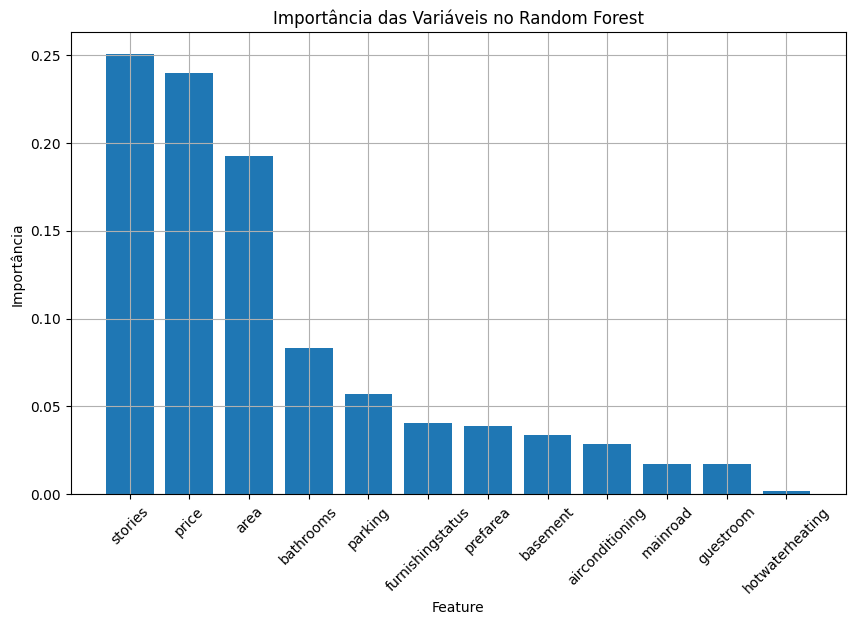

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

# Importância das features
feature_importances_rf = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualizar a importância das features
plt.figure(figsize=(10, 6))
plt.bar(feature_importances_rf['Feature'], feature_importances_rf['Importance'])
plt.xlabel("Feature")
plt.ylabel("Importância")
plt.title("Importância das Variáveis no Random Forest")
plt.xticks(rotation=45)
plt.grid()
plt.show()


####3.12 Comparação de Modelos: Árvores de Decisão (Sem Poda, Pós-Poda) e Random Forest

A seguir, analisamos os resultados obtidos nos diferentes modelos de previsão do número de quartos, com base nas métricas de precisão, recall, e f1-score, bem como na precisão geral.

**Análise dos Modelos**



1.   **Árvore de Decisão Sem Poda**:
* Precisão no Teste: 61.47%
* O modelo apresentou sobreajuste, com boa precisão para classes como 1 e 2, mas desempenho fraco para as classes menos representadas (3 e 4). A classe 4 não foi corretamente prevista.

2.   **Árvore de Decisão Pós-Poda**:
* Melhor ccp_alpha: 0.00899
* Precisão no Teste: 68%
* Com a poda, o modelo simplificou a estrutura, reduzindo o sobreajuste e melhorando ligeiramente a precisão global. No entanto, continua a ter dificuldades com classes minoritárias, como as classes 3 e 4.

3.   **Random Forest**:
* Precisão no Teste: 66.97%
* O Random Forest trouxe mais robustez ao modelo, com melhor desempenho geral em comparação à árvore sem poda, embora inferior à árvore pós-poda em precisão global. Demonstrou uma melhor previsão para a classe 2, mas ainda teve baixo desempenho nas classes 3 e 4.

### Comparação de Modelos

| Modelo                   | Precisão no Teste (%) | Desempenho nas Classes Minoritárias (3 e 4) | Observações                              |
|--------------------------|-----------------------|---------------------------------------------|------------------------------------------|
| **Árvore Sem Poda**      | 61.47                | Fraco                                       | Forte sobreajuste; classes 3 e 4 não bem representadas. |
| **Árvore Pós-Poda**      | 68.00                | Melhor que sem poda, mas ainda insuficiente | Melhor generalização e equilíbrio.       |
| **Random Forest**        | 66.97                | Classe 2 bem representada; 3 e 4 continuam fracas | Robustez superior, mas menor precisão geral que a árvore podada. |

##### Conclusão
- **Melhor Desempenho Geral**: A **Árvore Pós-Poda** obteve a maior precisão no conjunto de teste, com melhor equilíbrio entre classes.
- **Robustez e Generalização**: O **Random Forest** apresentou maior robustez ao lidar com diferentes subconjuntos, mas não conseguiu superar a árvore pós-poda em termos de precisão global.

Escolher o modelo ideal dependerá do objetivo:
- Para melhor generalização: **Random Forest**.
- Para melhor interpretabilidade e precisão global: **Árvore Pós-Poda**.


